In [158]:
#Import the packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')
import re

In [ ]:
start_time = time.time()

In [4]:
#Load the dataset.
marketing = pd.read_csv('bank_marketing_updated_v1.csv',skiprows=2)


In [5]:
marketing

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [6]:
marketing.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [7]:
#Dropping customer id column.
marketing.drop(['customerid'], axis=1, inplace=True)

In [8]:
marketing.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [15]:
marketing['job']=marketing.jobedu.str.split(',', expand=True)[0]
marketing['education']=marketing.jobedu.str.split(',', expand=True)[1]

In [17]:
marketing.drop(['jobedu'], axis=1, inplace=True)

In [18]:
marketing

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [19]:
#Handling missing values in Age column.
marketing.age.isnull().sum()

20

In [20]:
#print the shape of the dataset.
marketing.shape

(45211, 19)

In [22]:
#Calcualte the percentage of the missing values in Age column.
ageMissingPercentage = marketing.age.isnull().sum()/marketing.shape[0] * 100

In [23]:
ageMissingPercentage

0.0442370219636814

In [24]:
#Handle the missing values in Age column.
age_mean = marketing.age.mean()

In [25]:
age_mean

40.93565090394105

In [26]:
marketing['age'].fillna(age_mean, inplace=True)

In [27]:
#Check the missing values for age after handling it.
marketing.age.isnull().sum()

0

In [35]:
#Check the missing values for salary column.
marketing.salary.isnull().sum()

0

In [37]:
#Check the missing values for balance column.
marketing.balance.isnull().sum()

0

In [38]:
#Check the missing values for marital column.
marketing.marital.isnull().sum()

0

In [39]:
#check the missing values for targeted column.
marketing.targeted.isnull().sum()


0

In [40]:
#Check the missing values for default column
marketing.default.isnull().sum()

0

In [41]:
#Check the missing values for housing column.
marketing.housing.isnull().sum()

0

In [42]:
#Check the missing values for loan column.
marketing.loan.isnull().sum()

0

In [43]:
#Check the missing values for contact column.
marketing.contact.isnull().sum()

0

In [44]:
#Check the missing values for day column.
marketing.day.isnull().sum()

0

In [45]:
#Check the missing values for month column.
marketing.month.isnull().sum()

50

In [46]:
#Check the missing values for duration column.
marketing.duration.isnull().sum()

0

In [47]:
#Check the missing values for campaign column.
marketing.campaign.isnull().sum()

0

In [48]:
#check the missing values for pdays column.
marketing.pdays.isnull().sum()

0

In [50]:
#check the missing values for previous column.
marketing.previous.isnull().sum()

0

In [51]:
#check the missing values for poutcome column.
marketing.poutcome.isnull().sum()

0

In [52]:
#check the missing values for job column.
marketing.job.isnull().sum()

0

In [53]:
#check the missing values for education column.
marketing.education.isnull().sum()

0

In [62]:
#Handle the missing values for month.
month_mode = marketing.month.mode()
marketing.month.fillna(month_mode[0], inplace=True)


In [63]:
#Check the missing values for month column after handling it.
marketing.month.isnull().sum()

0

In [66]:
#Check the missing values for response column (dependent variable)
marketing.response.isnull().sum()

30

In [70]:
#Handle the missing values for response column.
response_mode = marketing.response.mode()
marketing['response'].fillna(response_mode[0], inplace=True)

In [71]:
#Check the missing values for response column after handling it.
marketing.response.isnull().sum()

0

In [77]:
#Updating all the values less than 0 with NaN.
marketing.loc[marketing.pdays <0, 'pdays'] = np.NaN

## Finding and Treating outliers.

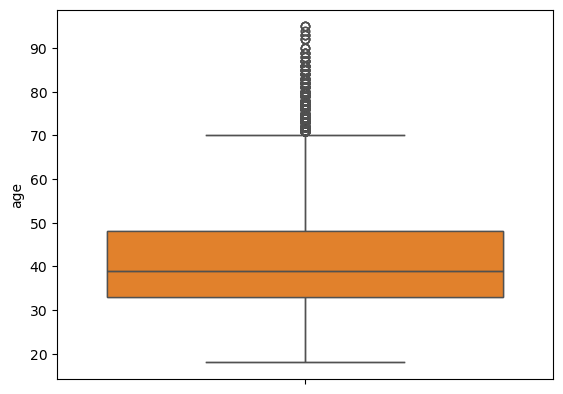

In [84]:
#Draw a box plot to find the outliers for age column.
sns.boxplot(marketing['age'])
plt.show()

In [85]:
#Calculating outliers for age.
iqr_age = marketing['age'].quantile(0.75) - marketing['age'].quantile(0.25)
l_age = marketing['age'].quantile(0.25) - 1.5 * iqr_age
u_age = marketing['age'].quantile(0.75) + 1.5 * iqr_age

In [86]:
#Treating outliers for age.
marketing['age'] = np.where(marketing['age'] > u_age, u_age, marketing['age'])
marketing['age'] = np.where(marketing['age'] < l_age, l_age, marketing['age'])

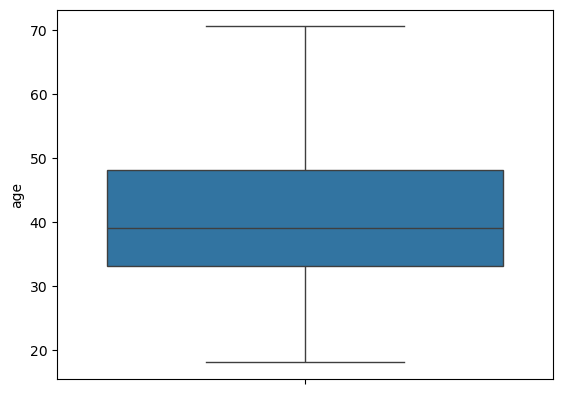

In [87]:
#Draw a box plot for age afer handling outliers.
sns.boxplot(marketing['age'])
plt.show()


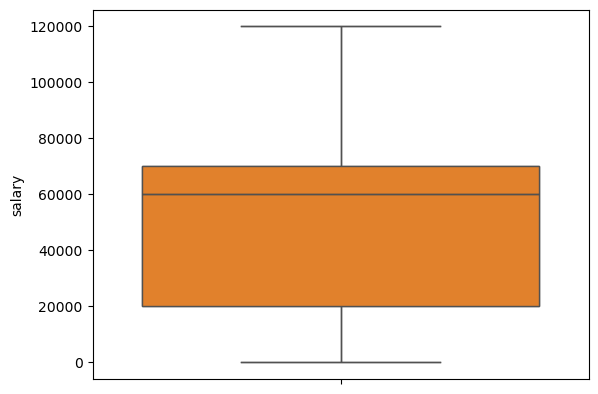

In [91]:
sns.boxplot(marketing['salary'])
plt.show()

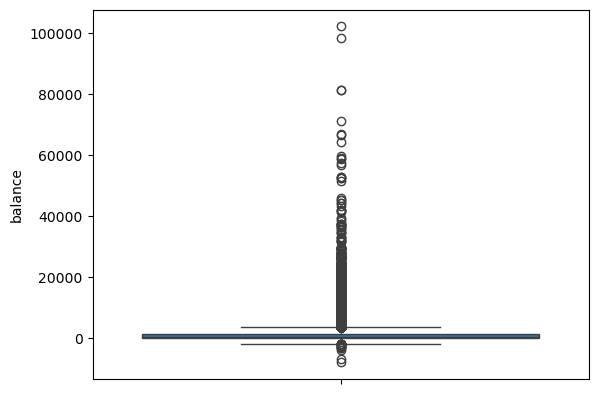

In [92]:
#Draw abox plot to find the outliers.
sns.boxplot(marketing['balance'])
plt.show()

In [95]:
#Treat the outliers for balance column.
iqr_balance = marketing['balance'].quantile(0.75) - marketing['balance'].quantile(0.25)
l_balance = marketing['balance'].quantile(0.25) - 1.5 * iqr_balance
u_balance = marketing['balance'].quantile(0.75) + 1.5 * iqr_balance
marketing['balance'] = np.where(marketing['balance'] < l_balance, l_balance, marketing['balance'])
marketing['balance'] = np.where(marketing['balance'] > u_balance, u_balance, marketing['balance'])

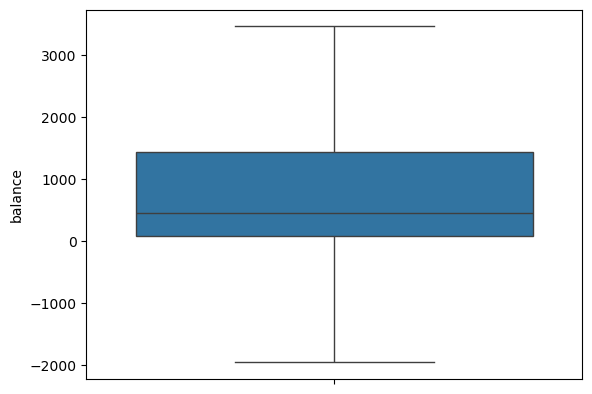

In [96]:
#Drawing the plot after treating the outliers.
sns.boxplot(marketing['balance'])
plt.show()

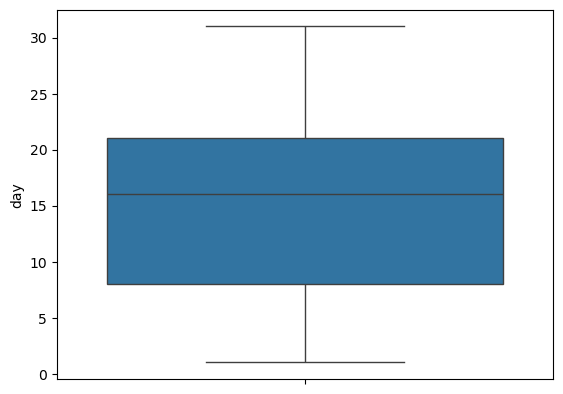

In [97]:
#Draw a box plot for day column to find the outliers.
sns.boxplot(marketing['day'])
plt.show()

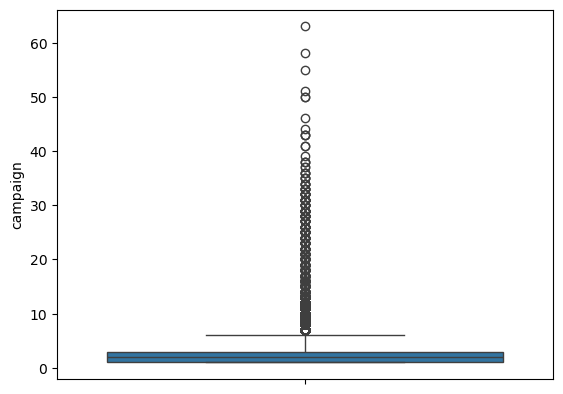

In [98]:
#Draw a box plot for campaign column to find the outliers.
sns.boxplot(marketing['campaign'])
plt.show()

In [99]:
#Treat the outliers for campaign column.
iqr_campaign = marketing['campaign'].quantile(0.75) - marketing['campaign'].quantile(0.25)
l_campaign = marketing['campaign'].quantile(0.25) - 1.5 * iqr_campaign
u_campaign = marketing['campaign'].quantile(0.75) + 1.5 * iqr_campaign
marketing['campaign'] = np.where(marketing['campaign'] < l_campaign, l_campaign, marketing['campaign'])
marketing['campaign'] = np.where(marketing['campaign'] > u_campaign, u_campaign, marketing['campaign'])

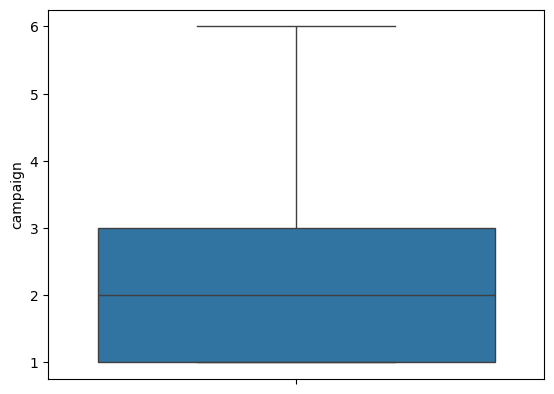

In [100]:
#Drawing the plot after treating the outliers.
sns.boxplot(marketing['campaign'])
plt.show()

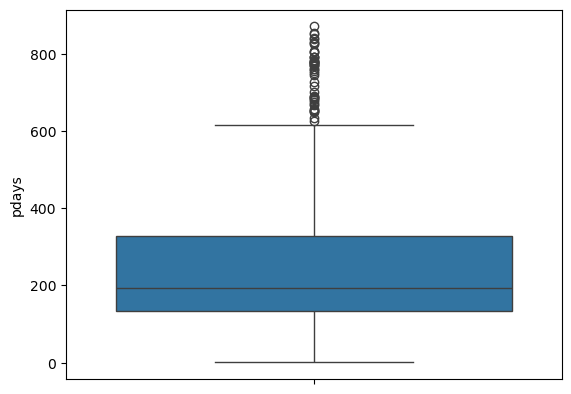

In [101]:
#Draw a box plot for pdays column to find the outliers.
sns.boxplot(marketing['pdays'])
plt.show()

In [102]:
#Treat the outliers for pdays column.
iqr_pdays = marketing['pdays'].quantile(0.75) - marketing['pdays'].quantile(0.25)
l_pdays = marketing['pdays'].quantile(0.25) - 1.5 * iqr_pdays
u_pdays = marketing['pdays'].quantile(0.75) + 1.5 * iqr_pdays
marketing['pdays'] = np.where(marketing['pdays'] < l_pdays, l_pdays, marketing['pdays'])
marketing['pdays'] = np.where(marketing['pdays'] > u_pdays, u_pdays, marketing['pdays'])

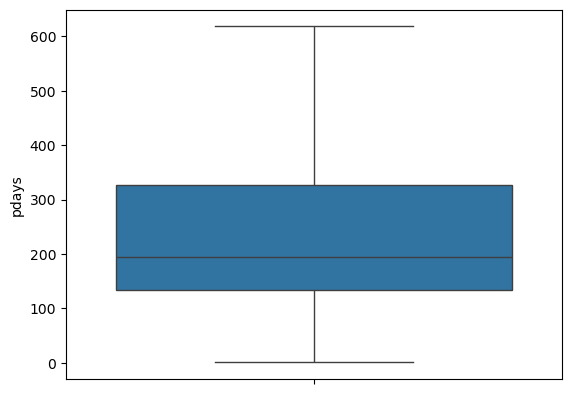

In [104]:
#Drawing the plot after treating the outliers.
sns.boxplot(marketing['pdays'])
plt.show()

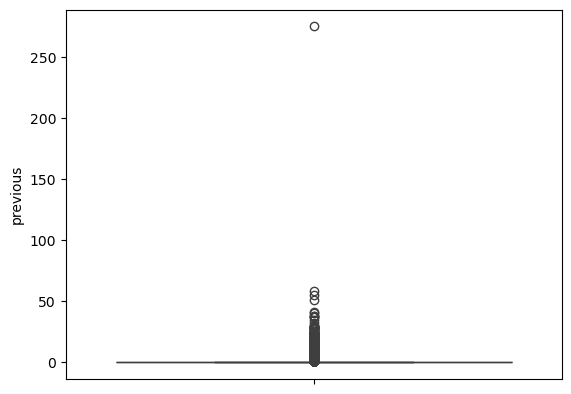

In [105]:
#Draw a box plot for pdays column to find the outliers
sns.boxplot(marketing['previous'])
plt.show()

In [106]:
#Treat the outliers for previous column.
iqr_previous = marketing['previous'].quantile(0.75) - marketing['previous'].quantile(0.25)
l_previous = marketing['previous'].quantile(0.25) - 1.5 * iqr_previous
u_previous = marketing['previous'].quantile(0.75) + 1.5 * iqr_previous
marketing['previous'] = np.where(marketing['previous'] < l_previous, l_previous, marketing['previous'])
marketing['previous'] = np.where(marketing['previous'] > u_previous, u_previous, marketing['previous'])

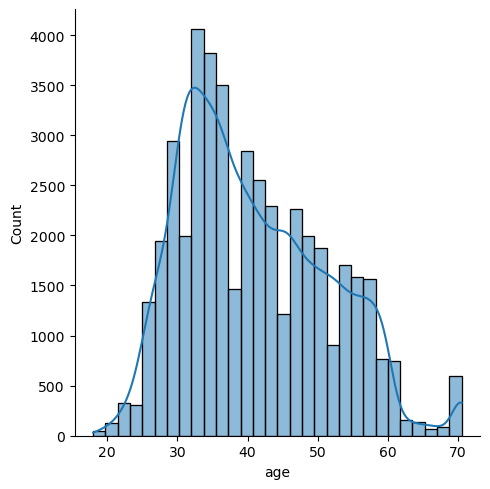

In [114]:
sns.displot(marketing['age'],bins=30, kde=True)
plt.show()

In [112]:
#Distribution is right skewed. Hence, performing the Z tramsformation.
marketing['new_age'] = (marketing['age'] - marketing['age'].mean())/marketing['age'].std()

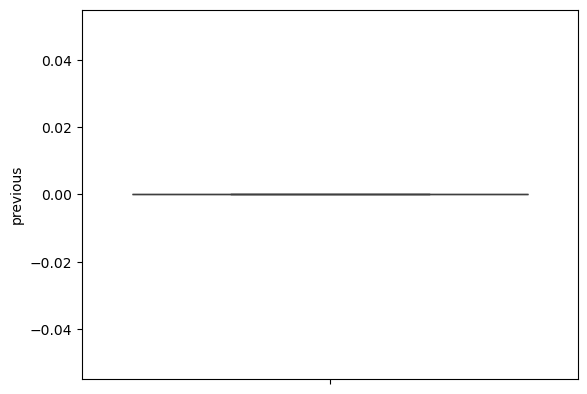

In [107]:
#Drawing the plot after treating the outliers.
sns.boxplot(marketing['previous'])
plt.show()

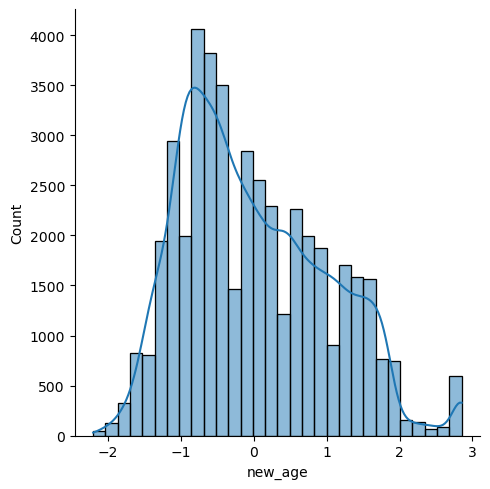

In [113]:
sns.displot(marketing['new_age'],bins=30, kde=True)
plt.show()

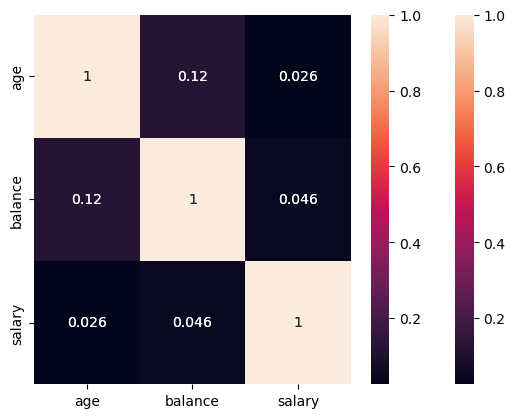

In [116]:
#Find the correlation between age, salary, balance.
corrs = marketing[['age', 'balance', 'salary']].corr()
sns.heatmap(corrs, annot=True)
plt.show()

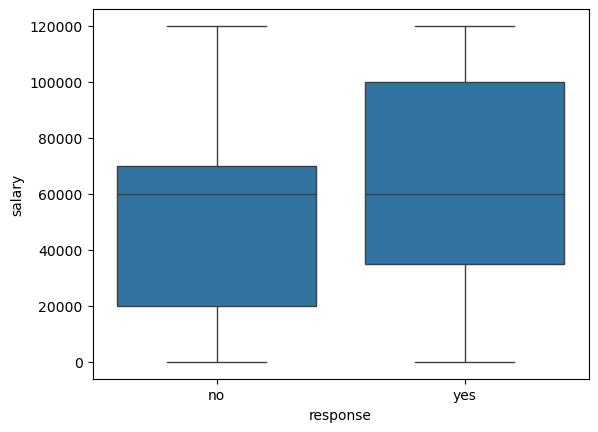

In [119]:
# /marketing.groupby('response')['salary'].mean()
sns.boxplot(data=marketing, x='response', y='salary')
plt.show()

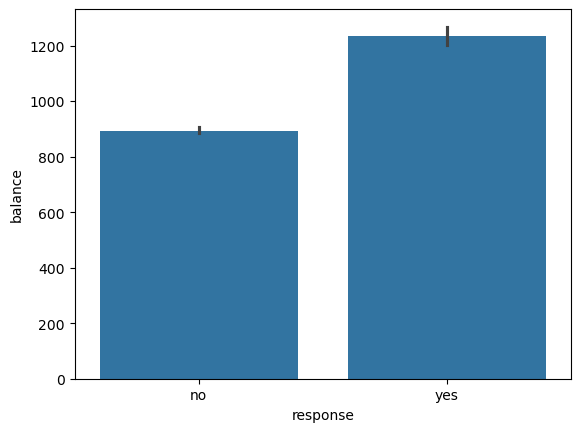

In [123]:
marketing.groupby('response')['balance'].mean()
sns.barplot(data=marketing, x="response", y="balance")
plt.show()

In [125]:
marketing.groupby('response')['age'].mean()
marketing['response_flag']=np.where(marketing.response=='yes',1,0)

In [127]:
marketing[marketing.response == 'no']

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,new_age,response_flag
0,58.0,100000,2143.0,married,yes,no,yes,no,unknown,5,...,261 sec,1.0,NaN,0.0,unknown,no,management,tertiary,1.648463,0
1,44.0,60000,29.0,single,yes,no,yes,no,unknown,5,...,151 sec,1.0,NaN,0.0,unknown,no,technician,secondary,0.301395,0
2,33.0,120000,2.0,married,yes,no,yes,yes,unknown,5,...,76 sec,1.0,NaN,0.0,unknown,no,entrepreneur,secondary,-0.757017,0
3,47.0,20000,1506.0,married,no,no,yes,no,unknown,5,...,92 sec,1.0,NaN,0.0,unknown,no,blue-collar,unknown,0.590052,0
4,33.0,0,1.0,single,no,no,no,no,unknown,5,...,198 sec,1.0,NaN,0.0,unknown,no,unknown,unknown,-0.757017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59.0,100000,138.0,married,yes,no,yes,yes,cellular,16,...,2.7 min,2.0,187.0,0.0,failure,no,management,tertiary,1.744683,0
45198,37.0,100000,1428.0,married,yes,no,no,no,cellular,16,...,5.55 min,2.0,NaN,0.0,unknown,no,management,tertiary,-0.372140,0
45199,34.0,20000,1475.0,single,yes,no,yes,no,cellular,16,...,19.4333333333333 min,3.0,530.0,0.0,other,no,blue-collar,secondary,-0.660797,0
45209,57.0,20000,668.0,married,yes,no,no,no,telephone,17,...,8.46666666666667 min,4.0,NaN,0.0,unknown,no,blue-collar,secondary,1.552244,0


In [128]:
marketing['response_flag'].value_counts()

response_flag
0    39924
1     5287
Name: count, dtype: int64

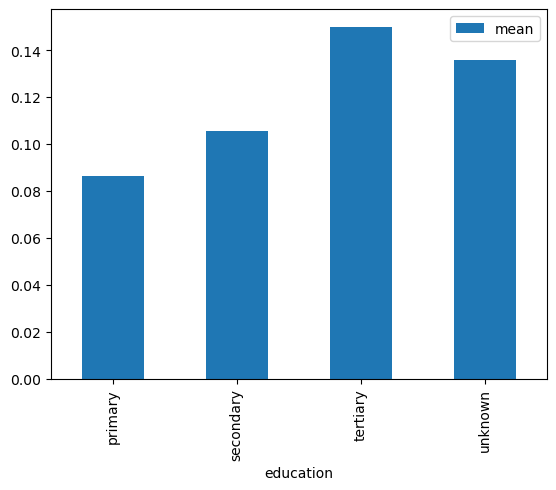

In [131]:
marketing.groupby('education')['response_flag'].agg(['mean']).plot.bar()
plt.show()

In [134]:
marketing_counts =marketing.groupby(['job','response_flag']).size().unstack()

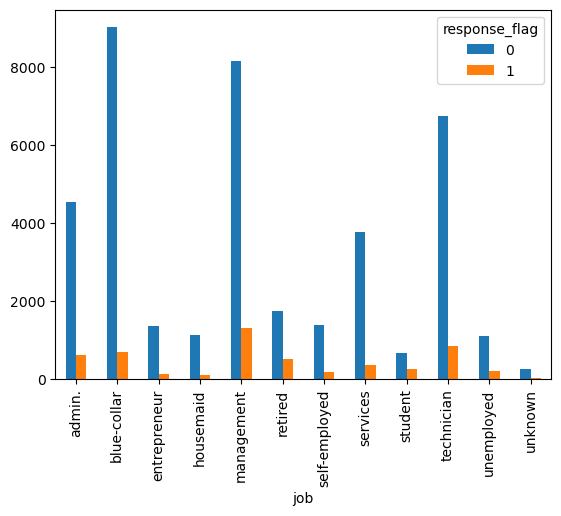

In [140]:
marketing_counts.plot(kind='bar')
plt.show()

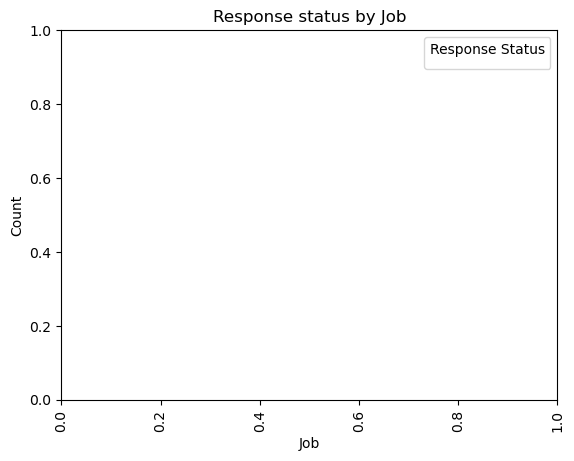

In [141]:
#Customize the plot
plt.legend(title="Response Status", labels=["No","Yes"]) #Legend for 0 and 1
plt.ylabel("Count") #Label for y-axis
plt.xlabel("Job") #Label fro x-axis
plt.title("Response status by Job") #Title of the plot
plt.xticks(rotation=90) #Rotate x-axis labels for better readability
plt.show()

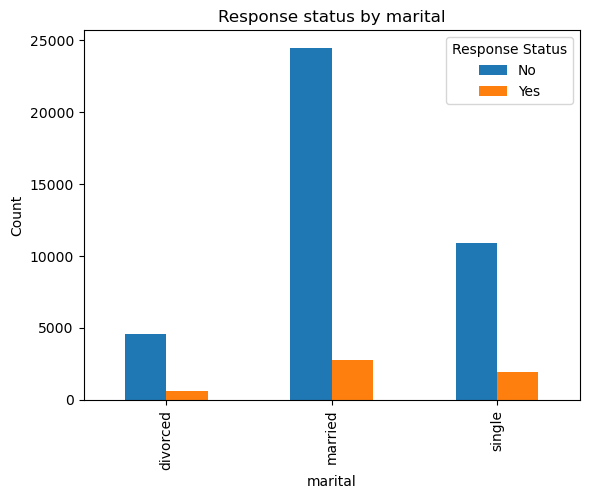

In [149]:
marketing_counts =marketing.groupby(['marital','response_flag']).size().unstack()

#Plot as a grouped bar chart (side by side bars)
marketing_counts.plot(kind='bar')

#Customize the plot
plt.legend(title="Response Status", labels=["No","Yes"]) #Legend for 0 and 1
plt.ylabel("Count") #Label for y-axis
plt.xlabel("marital") #Label fro x-axis
plt.title("Response status by marital") #Title of the plot
plt.xticks(rotation=90) #Rotate x-axis labels for better readability
plt.show()

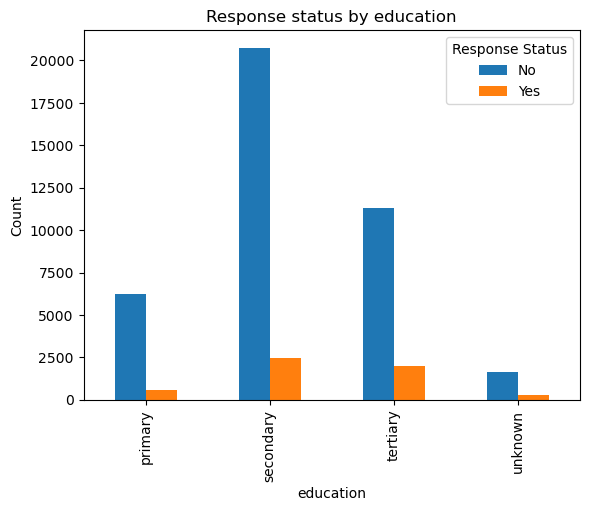

In [150]:
marketing_counts =marketing.groupby(['education','response_flag']).size().unstack()

#Plot as a grouped bar chart (side by side bars)
marketing_counts.plot(kind='bar')

#Customize the plot
plt.legend(title="Response Status", labels=["No","Yes"]) #Legend for 0 and 1
plt.ylabel("Count") #Label for y-axis
plt.xlabel("education") #Label fro x-axis
plt.title("Response status by education") #Title of the plot
plt.xticks(rotation=90) #Rotate x-axis labels for better readability
plt.show()

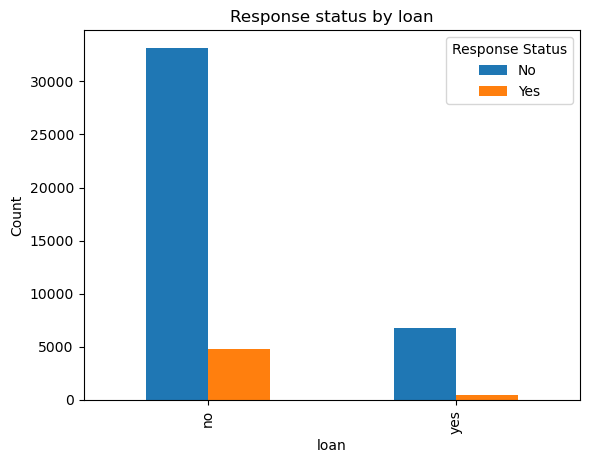

In [153]:
marketing_counts =marketing.groupby(['loan','response_flag']).size().unstack()
#Plot as a grouped bar chart (side by side bars)
marketing_counts.plot(kind='bar')
#Customize the plot
plt.legend(title="Response Status", labels=["No","Yes"]) #Legend for 0 and 1
plt.ylabel("Count") #Label for y-axis
plt.xlabel("loan") #Label fro x-axis
plt.title("Response status by loan") #Title of the plot
plt.xticks(rotation=90) #Rotate x-axis labels for better readability
plt.show()

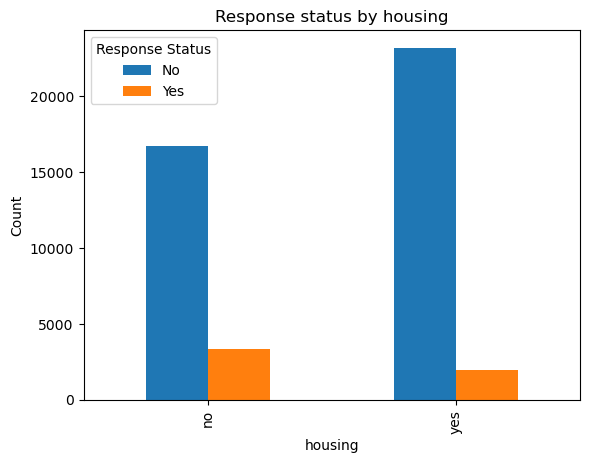

In [154]:
marketing_counts =marketing.groupby(['housing','response_flag']).size().unstack()
#Plot as a grouped bar chart (side by side bars)
marketing_counts.plot(kind='bar')
#Customize the plot
plt.legend(title="Response Status", labels=["No","Yes"]) #Legend for 0 and 1|
plt.ylabel("Count") #Label for y-axis
plt.xlabel("housing") #Label fro x-axis
plt.title("Response status by housing") #Title of the plot
plt.xticks(rotation=90) #Rotate x-axis labels for better readability
plt.show()

In [159]:
#Function to extract number
def number_extract(col):
    return col.astype(str).apply(lambda x: ''.join(re.findall(r'\d+', str(x))) if pd.notna(x) else '')
marketing['duration1']=number_extract(marketing['duration'])
marketing['duration1']=marketing['duration1'].astype(float)
# end_time = time.time()
# execution_time = end_time-start_time
# execution_time

In [162]:
marketing['duration']

0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: duration, Length: 45211, dtype: object

In [161]:
marketing

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,response,job,education,new_age,response_flag,duration1
0,58.0,100000,2143.0,married,yes,no,yes,no,unknown,5,...,1.0,NaN,0.0,unknown,no,management,tertiary,1.648463,0,2.610000e+02
1,44.0,60000,29.0,single,yes,no,yes,no,unknown,5,...,1.0,NaN,0.0,unknown,no,technician,secondary,0.301395,0,1.510000e+02
2,33.0,120000,2.0,married,yes,no,yes,yes,unknown,5,...,1.0,NaN,0.0,unknown,no,entrepreneur,secondary,-0.757017,0,7.600000e+01
3,47.0,20000,1506.0,married,no,no,yes,no,unknown,5,...,1.0,NaN,0.0,unknown,no,blue-collar,unknown,0.590052,0,9.200000e+01
4,33.0,0,1.0,single,no,no,no,no,unknown,5,...,1.0,NaN,0.0,unknown,no,unknown,unknown,-0.757017,0,1.980000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825.0,married,yes,no,no,no,cellular,17,...,3.0,NaN,0.0,unknown,yes,technician,tertiary,0.974929,1,1.628333e+14
45207,70.5,55000,1729.0,divorced,yes,no,no,no,cellular,17,...,2.0,NaN,0.0,unknown,yes,retired,primary,2.851203,1,7.600000e+01
45208,70.5,55000,3462.0,married,yes,no,no,no,cellular,17,...,5.0,184.0,0.0,success,yes,retired,secondary,2.851203,1,1.878333e+14
45209,57.0,20000,668.0,married,yes,no,no,no,telephone,17,...,4.0,NaN,0.0,unknown,no,blue-collar,secondary,1.552244,0,8.466667e+14


In [36]:
marketing.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration      object
campaign       int64
pdays          int64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object